## 1. Biblioteki

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import talos as ta


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
%load_ext tensorboard

from keras.callbacks import EarlyStopping

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import plot_model

Using TensorFlow backend.



## 2. Dane

In [2]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

caly_df.shape

(1881, 27)

In [3]:
caly_df.head()

,Województwo,Data urodzenia,IE,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
0,WIELKOPOLSKIE,2020,2120,137,127,121,113,106,128,109,...,1370,577,2,452,1,115.0,114.0,109.0,127.0,123.0
1,KUJAWSKO-POMORSKIE,2018,1912,126,123,109,113,103,128,114,...,1209,358,-16,354,-4,115.0,113.0,104.0,123.0,123.0
2,POMORSKIE,2020,2126,126,120,110,107,102,124,113,...,982,368,-4,350,4,104.0,103.0,102.0,122.0,117.0
3,KUJAWSKO-POMORSKIE,2020,2089,133,111,104,110,99,114,114,...,1080,546,12,410,7,106.0,106.0,101.0,112.0,112.0
4,ZACHODNIOPOMORSKIE,2020,2853,125,115,91,95,101,124,134,...,516,501,36,289,15,102.0,102.0,118.0,123.0,109.0


In [4]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   IE              1881 non-null   int64   
 3   PI-PROD         1881 non-null   int64   
 4   PI-POKR         1881 non-null   int64   
 5   Prc             1881 non-null   int64   
 6   Psm             1881 non-null   int64   
 7   Pnr             1881 non-null   int64   
 8   Pw              1881 non-null   int64   
 9   PI-PLOD         1881 non-null   int64   
 10  CRj             1881 non-null   int64   
 11  CRk             1881 non-null   int64   
 12  PP              1881 non-null   int64   
 13  OMC             1881 non-null   int64   
 14  WH-KSOM         1881 non-null   int64   
 15  WH-DLUG         1881 non-null   int64   
 16  IP              1881 non-null   int64   
 17  kg ml          

## 3. Usuwam mniejszości zmiennych kategorycznych

In [5]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [6]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [7]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [8]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [9]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [10]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [11]:
caly_df.shape

(1875, 27)

## 4. Zakodowuje zmienne kategoryczne

In [12]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

In [13]:
caly_df

,IE,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,...,ŁÓDZKIE,ŚLĄSKIE,ŚWIĘTOKRZYSKIE,2015,2016,2017,2018,2019,2020,2021
0,2120,137,127,121,113,106,128,109,107,110,...,0,0,0,0,0,0,0,0,1,0
1,1912,126,123,109,113,103,128,114,114,113,...,0,0,0,0,0,0,1,0,0,0
2,2126,126,120,110,107,102,124,113,112,117,...,0,0,0,0,0,0,0,0,1,0
3,2089,133,111,104,110,99,114,114,113,126,...,0,0,0,0,0,0,0,0,1,0
4,2853,125,115,91,95,101,124,134,129,133,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2184,134,119,112,115,106,118,102,103,108,...,0,0,0,0,0,0,0,0,1,0
185,1956,132,117,103,103,107,119,93,94,102,...,0,0,0,0,0,0,1,0,0,0
186,2085,120,109,106,97,96,115,120,114,134,...,0,0,0,0,0,0,0,1,0,0
187,1970,113,114,97,94,103,120,114,104,115,...,1,0,0,0,0,0,1,0,0,0


In [14]:
caly_label=caly_df['IE']
del caly_df['IE']

In [15]:
caly_df.shape

(1875, 47)

## 1.2 Standaryzacja

In [16]:
caly_df

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,ŁÓDZKIE,ŚLĄSKIE,ŚWIĘTOKRZYSKIE,2015,2016,2017,2018,2019,2020,2021
0,137,127,121,113,106,128,109,107,110,101,...,0,0,0,0,0,0,0,0,1,0
1,126,123,109,113,103,128,114,114,113,94,...,0,0,0,0,0,0,1,0,0,0
2,126,120,110,107,102,124,113,112,117,94,...,0,0,0,0,0,0,0,0,1,0
3,133,111,104,110,99,114,114,113,126,89,...,0,0,0,0,0,0,0,0,1,0
4,125,115,91,95,101,124,134,129,133,102,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,134,119,112,115,106,118,102,103,108,92,...,0,0,0,0,0,0,0,0,1,0
185,132,117,103,103,107,119,93,94,102,96,...,0,0,0,0,0,0,1,0,0,0
186,120,109,106,97,96,115,120,114,134,100,...,0,0,0,0,0,0,0,1,0,0
187,113,114,97,94,103,120,114,104,115,132,...,1,0,0,0,0,0,1,0,0,0


In [17]:
caly_df.columns

Index([            'PI-PROD',             'PI-POKR',                 'Prc',
                       'Psm',                 'Pnr',                  'Pw',
                   'PI-PLOD',                 'CRj',                 'CRk',
                        'PP',                 'OMC',             'WH-KSOM',
                   'WH-DLUG',                  'IP',               'kg ml',
                     'kg tł',                '% tł',               'kg bi',
                      '% bi',                  'rc',                  'sm',
                        'nr',                   'w',                  'og',
              'DOLNOŚLĄSKIE',  'KUJAWSKO-POMORSKIE',           'LUBELSKIE',
                  'LUBUSKIE',         'MAZOWIECKIE',         'MAŁOPOLSKIE',
                  'OPOLSKIE',        'PODKARPACKIE',           'PODLASKIE',
                 'POMORSKIE', 'WARMIŃSKO-MAZURSKIE',       'WIELKOPOLSKIE',
        'ZACHODNIOPOMORSKIE',             'ŁÓDZKIE',             'ŚLĄSKIE',
            

In [24]:
caly_df.iloc[:,:24].columns

Index(['PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw', 'PI-PLOD', 'CRj',
       'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł',
       '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og'],
      dtype='object')

In [25]:
scaler = StandardScaler()
caly_df.iloc[:,:24]=scaler.fit_transform(caly_df.iloc[:,:24])

In [26]:
caly_df

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,ŁÓDZKIE,ŚLĄSKIE,ŚWIĘTOKRZYSKIE,2015,2016,2017,2018,2019,2020,2021
0,1.568811,1.362905,1.759574,1.028839,-0.008881,1.168288,-0.567880,-0.584846,-0.723926,-0.278168,...,0,0,0,0,0,0,0,0,1,0
1,-0.153024,0.797165,0.236280,1.028839,-0.518606,1.168288,-0.105778,0.199952,-0.434119,-1.180083,...,0,0,0,0,0,0,1,0,0,0
2,-0.153024,0.372860,0.363221,0.068305,-0.688514,0.664976,-0.198199,-0.024276,-0.047709,-1.180083,...,0,0,0,0,0,0,0,0,1,0
3,0.942689,-0.900055,-0.398426,0.548572,-1.198239,-0.593304,-0.105778,0.087838,0.821714,-1.824309,...,0,0,0,0,0,0,0,0,1,0
4,-0.309555,-0.334315,-2.048662,-1.852765,-0.858422,0.664976,1.742629,1.881661,1.497931,-0.149323,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1.099219,0.231425,0.617104,1.349018,-0.008881,-0.089992,-1.214823,-1.033302,-0.917131,-1.437774,...,0,0,0,0,0,0,0,0,1,0
185,0.786158,-0.051445,-0.525367,-0.572052,0.161028,0.035836,-2.046606,-2.042328,-1.496746,-0.922393,...,0,0,0,0,0,0,1,0,0,0
186,-1.092207,-1.182924,-0.144544,-1.532586,-1.707964,-0.467476,0.448744,0.199952,1.594534,-0.407013,...,0,0,0,0,0,0,0,1,0,0
187,-2.187920,-0.475750,-1.287015,-2.012854,-0.518606,0.161664,-0.105778,-0.921188,-0.240914,3.716029,...,1,0,0,0,0,0,1,0,0,0


In [27]:
caly_df = np.array(caly_df)

In [28]:
caly_df

array([[ 1.56881066,  1.36290523,  1.75957434, ...,  0.        ,
         1.        ,  0.        ],
       [-0.15302416,  0.79716529,  0.23627989, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15302416,  0.37286034,  0.3632211 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.09220678, -1.18292449, -0.14454372, ...,  1.        ,
         0.        ,  0.        ],
       [-2.18791984, -0.47574957, -1.28701455, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15302416, -0.05144462, -0.01760251, ...,  0.        ,
         1.        ,  0.        ]])

In [29]:
caly_label = np.array(caly_label)

In [30]:
caly_label

array([2120, 1912, 2126, ..., 2085, 1970, 2146], dtype=int64)

In [31]:
METRICS=['mae']

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
def numerai_model(x_train, y_train, x_val, y_val, params):
    print(params)
    callback = EarlyStopping(monitor='val_loss', patience=1000)
    model = Sequential()
    
    ## initial layer
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer = params['kernel_initializer'] ))
    if params['batc_normalization']==True:
        model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))
    
    ## hidden layers
    for i in range(params['hidden_layers']):
        print (f"adding layer {i+1}")
        model.add(Dense(params['hidden_neuron'], activation='relu',
                    kernel_initializer=params['kernel_initializer']))
        if params['batc_normalization']==True:
            model.add(BatchNormalization())
        model.add(Dropout(params['dropout']))
    
    
    ## final layer
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss='mean_absolute_error', 
                  optimizer=params['optimizer'])
    
    history = model.fit(x_train, y_train,
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        callbacks=[callback] #,ta.live()
                        )
    
    return history, model

In [34]:
p = {'first_neuron':250, #best 250
     'hidden_neuron':25,# best 25
     'hidden_layers':2,  #best 2
     'batch_size': 128, # best 128
     'optimizer': 'adadelta',# best adadelta 
     'kernel_initializer': 'orthogonal', #best orthogonogal
     'epochs':1000000, # never touch it
     'dropout': 0,  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':'relu',
     'batc_normalization':False, # do zrobienia potem
     'last_activation': 'linear'} #never touch it
#     
#    

# 2 Cross-validacja

Zamiast dobierać wszystkie hiperparametry na nowo, sprawdzę czy siec preferuje inne w waskim zakresie

In [35]:
caly_df.shape

(1875, 47)

In [37]:
kfold = StratifiedKFold(n_splits=5, shuffle=False)
cvscores = []
dane_do_zapisu=pd.DataFrame()
licznik=1

for train, test in kfold.split(caly_df, caly_label): # train 80, test 20 %
    train, val = train_test_split(train, test_size=0.1, random_state=42) # train 72 % test 20% val 8 %
    
    returny=numerai_model(caly_df[train], caly_label[train], caly_df[val],caly_label[val], p)
    
    model=returny[1]
    # evaluate the model
    
    predykcje = model.predict(caly_df[test])
    scores = model.evaluate(caly_df[test], caly_label[test], verbose=2)
    dane_folda=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    
    dane_do_zapisu=pd.concat([dane_do_zapisu,dane_folda])
    cvscores.append(scores)
    licznik+=1

Epoch 24070/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1582 - val_loss: 18.0396
Epoch 24071/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.1585 - val_loss: 18.0404
Epoch 24072/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1605 - val_loss: 18.0438
Epoch 24073/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1585 - val_loss: 18.0405
Epoch 24074/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1590 - val_loss: 18.0383
Epoch 24075/1000000
1350/1350 [==============================] - 0s 18us/sample - loss: 16.1597 - val_loss: 18.0457
Epoch 24076/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.1578 - val_loss: 18.0394
Epoch 24077/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.1575 - val_loss: 18.0366
Epoch 24078/1000000
1350/1350 [==============================] - 0s 16us

1350/1350 [==============================] - 0s 17us/sample - loss: 16.1420 - val_loss: 18.0312
Epoch 24141/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1429 - val_loss: 18.0361
Epoch 24142/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.1414 - val_loss: 18.0284
Epoch 24143/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1419 - val_loss: 18.0343
Epoch 24144/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1414 - val_loss: 18.0385
Epoch 24145/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.1407 - val_loss: 18.0308
Epoch 24146/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1409 - val_loss: 18.0359
Epoch 24147/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1417 - val_loss: 18.0358
Epoch 24148/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.1

Epoch 24211/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.1270 - val_loss: 18.0344
Epoch 24212/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.1273 - val_loss: 18.0308
Epoch 24213/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 16.1266 - val_loss: 18.0314
Epoch 24214/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.1251 - val_loss: 18.0326
Epoch 24215/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.1258 - val_loss: 18.0332
Epoch 24216/1000000
1350/1350 [==============================] - 0s 18us/sample - loss: 16.1240 - val_loss: 18.0303
Epoch 24217/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.1262 - val_loss: 18.0281
Epoch 24218/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1238 - val_loss: 18.0320
Epoch 24219/1000000
1350/1350 [==============================] - 0s 16us

1350/1350 [==============================] - 0s 16us/sample - loss: 16.1091 - val_loss: 18.0329
Epoch 24282/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1104 - val_loss: 18.0294
Epoch 24283/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.1098 - val_loss: 18.0317
Epoch 24284/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.1092 - val_loss: 18.0300
Epoch 24285/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1080 - val_loss: 18.0317
Epoch 24286/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.1086 - val_loss: 18.0305
Epoch 24287/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.1099 - val_loss: 18.0299
Epoch 24288/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.1079 - val_loss: 18.0390
Epoch 24289/1000000
1350/1350 [==============================] - 0s 25us/sample - loss: 16.1

Epoch 24352/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0925 - val_loss: 18.0259
Epoch 24353/1000000
1350/1350 [==============================] - 0s 18us/sample - loss: 16.0937 - val_loss: 18.0242
Epoch 24354/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0939 - val_loss: 18.0322
Epoch 24355/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.0918 - val_loss: 18.0274
Epoch 24356/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.0932 - val_loss: 18.0244
Epoch 24357/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0923 - val_loss: 18.0259
Epoch 24358/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 16.0912 - val_loss: 18.0289
Epoch 24359/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 16.0927 - val_loss: 18.0264
Epoch 24360/1000000
1350/1350 [==============================] - 0s 15us

1350/1350 [==============================] - 0s 16us/sample - loss: 16.0764 - val_loss: 18.0270
Epoch 24423/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0756 - val_loss: 18.0279
Epoch 24424/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.0774 - val_loss: 18.0279
Epoch 24425/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.0767 - val_loss: 18.0235
Epoch 24426/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0761 - val_loss: 18.0246
Epoch 24427/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0747 - val_loss: 18.0256
Epoch 24428/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.0748 - val_loss: 18.0291
Epoch 24429/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0745 - val_loss: 18.0252
Epoch 24430/1000000
1350/1350 [==============================] - 0s 18us/sample - loss: 16.0

Epoch 24493/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0594 - val_loss: 18.0317
Epoch 24494/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0603 - val_loss: 18.0230
Epoch 24495/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0596 - val_loss: 18.0261
Epoch 24496/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0589 - val_loss: 18.0281
Epoch 24497/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 16.0587 - val_loss: 18.0297
Epoch 24498/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0601 - val_loss: 18.0216
Epoch 24499/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.0607 - val_loss: 18.0211
Epoch 24500/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.0572 - val_loss: 18.0213
Epoch 24501/1000000
1350/1350 [==============================] - 0s 15us

1350/1350 [==============================] - 0s 17us/sample - loss: 16.0432 - val_loss: 18.0231
Epoch 24564/1000000
1350/1350 [==============================] - 0s 18us/sample - loss: 16.0454 - val_loss: 18.0169
Epoch 24565/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.0429 - val_loss: 18.0257
Epoch 24566/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.0424 - val_loss: 18.0229
Epoch 24567/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0418 - val_loss: 18.0289
Epoch 24568/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.0432 - val_loss: 18.0203
Epoch 24569/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.0421 - val_loss: 18.0205
Epoch 24570/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0408 - val_loss: 18.0290
Epoch 24571/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.0

Epoch 24634/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0267 - val_loss: 18.0188
Epoch 24635/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0278 - val_loss: 18.0173
Epoch 24636/1000000
1350/1350 [==============================] - 0s 19us/sample - loss: 16.0278 - val_loss: 18.0204
Epoch 24637/1000000
1350/1350 [==============================] - 0s 19us/sample - loss: 16.0268 - val_loss: 18.0194
Epoch 24638/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0263 - val_loss: 18.0146
Epoch 24639/1000000
1350/1350 [==============================] - 0s 18us/sample - loss: 16.0266 - val_loss: 18.0194
Epoch 24640/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 16.0262 - val_loss: 18.0213
Epoch 24641/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0262 - val_loss: 18.0242
Epoch 24642/1000000
1350/1350 [==============================] - 0s 19us

1350/1350 [==============================] - 0s 15us/sample - loss: 16.0116 - val_loss: 18.0221
Epoch 24705/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.0111 - val_loss: 18.0172
Epoch 24706/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 16.0097 - val_loss: 18.0158
Epoch 24707/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0103 - val_loss: 18.0173
Epoch 24708/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0102 - val_loss: 18.0148
Epoch 24709/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 16.0089 - val_loss: 18.0083
Epoch 24710/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.0091 - val_loss: 18.0111
Epoch 24711/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.0084 - val_loss: 18.0166
Epoch 24712/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 16.0

Epoch 24775/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9943 - val_loss: 18.0114
Epoch 24776/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9947 - val_loss: 18.0129
Epoch 24777/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.9933 - val_loss: 18.0081
Epoch 24778/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.9935 - val_loss: 18.0149
Epoch 24779/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.9939 - val_loss: 18.0182
Epoch 24780/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.9927 - val_loss: 18.0136
Epoch 24781/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9922 - val_loss: 18.0184
Epoch 24782/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.9935 - val_loss: 18.0150
Epoch 24783/1000000
1350/1350 [==============================] - 0s 15us

1350/1350 [==============================] - 0s 14us/sample - loss: 15.9780 - val_loss: 18.0101
Epoch 24846/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9775 - val_loss: 18.0057
Epoch 24847/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9780 - val_loss: 18.0074
Epoch 24848/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9764 - val_loss: 18.0084
Epoch 24849/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9768 - val_loss: 18.0111
Epoch 24850/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9773 - val_loss: 18.0080
Epoch 24851/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9757 - val_loss: 18.0196
Epoch 24852/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9773 - val_loss: 18.0126
Epoch 24853/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9

Epoch 24916/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9622 - val_loss: 18.0094
Epoch 24917/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9617 - val_loss: 18.0082
Epoch 24918/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9624 - val_loss: 18.0053
Epoch 24919/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9618 - val_loss: 18.0084
Epoch 24920/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9615 - val_loss: 18.0051
Epoch 24921/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9615 - val_loss: 18.0115
Epoch 24922/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9592 - val_loss: 18.0111
Epoch 24923/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9585 - val_loss: 18.0107
Epoch 24924/1000000
1350/1350 [==============================] - 0s 13us

1350/1350 [==============================] - 0s 14us/sample - loss: 15.9463 - val_loss: 18.0037
Epoch 24987/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9458 - val_loss: 18.0050
Epoch 24988/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9457 - val_loss: 18.0011
Epoch 24989/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.9445 - val_loss: 18.0033
Epoch 24990/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9444 - val_loss: 18.0009
Epoch 24991/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9449 - val_loss: 18.0147
Epoch 24992/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9454 - val_loss: 18.0055
Epoch 24993/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9435 - val_loss: 18.0040
Epoch 24994/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9

Epoch 25057/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9279 - val_loss: 18.0066
Epoch 25058/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9292 - val_loss: 18.0011
Epoch 25059/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9293 - val_loss: 18.0012
Epoch 25060/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9284 - val_loss: 18.0067
Epoch 25061/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9283 - val_loss: 18.0033
Epoch 25062/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9275 - val_loss: 18.0061
Epoch 25063/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9274 - val_loss: 18.0020
Epoch 25064/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9276 - val_loss: 18.0035
Epoch 25065/1000000
1350/1350 [==============================] - 0s 14us

1350/1350 [==============================] - 0s 13us/sample - loss: 15.9151 - val_loss: 17.9990
Epoch 25128/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9140 - val_loss: 18.0057
Epoch 25129/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9147 - val_loss: 18.0037
Epoch 25130/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9131 - val_loss: 18.0020
Epoch 25131/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.9119 - val_loss: 18.0017
Epoch 25132/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9123 - val_loss: 18.0015
Epoch 25133/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9119 - val_loss: 18.0024
Epoch 25134/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9117 - val_loss: 17.9995
Epoch 25135/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.9

Epoch 25198/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8974 - val_loss: 17.9983
Epoch 25199/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8969 - val_loss: 17.9939
Epoch 25200/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8964 - val_loss: 17.9965
Epoch 25201/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8970 - val_loss: 17.9988
Epoch 25202/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8970 - val_loss: 17.9986
Epoch 25203/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8962 - val_loss: 17.9984
Epoch 25204/1000000
1350/1350 [==============================] - 0s 21us/sample - loss: 15.8953 - val_loss: 17.9929
Epoch 25205/1000000
1350/1350 [==============================] - 0s 27us/sample - loss: 15.8952 - val_loss: 17.9975
Epoch 25206/1000000
1350/1350 [==============================] - 0s 16us

1350/1350 [==============================] - 0s 15us/sample - loss: 15.8799 - val_loss: 17.9937
Epoch 25269/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8799 - val_loss: 17.9936
Epoch 25270/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8792 - val_loss: 17.9998
Epoch 25271/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8821 - val_loss: 17.9954
Epoch 25272/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8809 - val_loss: 17.9962
Epoch 25273/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8791 - val_loss: 17.9953
Epoch 25274/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8800 - val_loss: 17.9903
Epoch 25275/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8792 - val_loss: 17.9988
Epoch 25276/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8

Epoch 25339/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8643 - val_loss: 17.9976
Epoch 25340/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8647 - val_loss: 17.9969
Epoch 25341/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8646 - val_loss: 17.9922
Epoch 25342/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8637 - val_loss: 17.9965
Epoch 25343/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8647 - val_loss: 17.9907
Epoch 25344/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8631 - val_loss: 17.9908
Epoch 25345/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8635 - val_loss: 17.9923
Epoch 25346/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8644 - val_loss: 17.9936
Epoch 25347/1000000
1350/1350 [==============================] - 0s 13us

1350/1350 [==============================] - 0s 14us/sample - loss: 15.8497 - val_loss: 17.9897
Epoch 25410/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8477 - val_loss: 17.9906
Epoch 25411/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8476 - val_loss: 17.9903
Epoch 25412/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8483 - val_loss: 17.9895
Epoch 25413/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8485 - val_loss: 17.9906
Epoch 25414/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.8476 - val_loss: 17.9973
Epoch 25415/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8482 - val_loss: 17.9952
Epoch 25416/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8468 - val_loss: 17.9885
Epoch 25417/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8

Epoch 25480/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8327 - val_loss: 17.9899
Epoch 25481/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8319 - val_loss: 17.9847
Epoch 25482/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.8326 - val_loss: 17.9893
Epoch 25483/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.8316 - val_loss: 17.9891
Epoch 25484/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.8296 - val_loss: 17.9976
Epoch 25485/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.8315 - val_loss: 17.9907
Epoch 25486/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.8326 - val_loss: 17.9912
Epoch 25487/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8315 - val_loss: 17.9894
Epoch 25488/1000000
1350/1350 [==============================] - 0s 14us

1350/1350 [==============================] - 0s 14us/sample - loss: 15.8169 - val_loss: 17.9818
Epoch 25551/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8171 - val_loss: 17.9835
Epoch 25552/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8156 - val_loss: 17.9838
Epoch 25553/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8151 - val_loss: 17.9863
Epoch 25554/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8157 - val_loss: 17.9874
Epoch 25555/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8140 - val_loss: 17.9839
Epoch 25556/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8152 - val_loss: 17.9929
Epoch 25557/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8153 - val_loss: 17.9838
Epoch 25558/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8

Epoch 25621/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.8001 - val_loss: 17.9902
Epoch 25622/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7981 - val_loss: 17.9812
Epoch 25623/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8011 - val_loss: 17.9845
Epoch 25624/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7997 - val_loss: 17.9870
Epoch 25625/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7988 - val_loss: 17.9787
Epoch 25626/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7997 - val_loss: 17.9793
Epoch 25627/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.8008 - val_loss: 17.9870
Epoch 25628/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7995 - val_loss: 17.9844
Epoch 25629/1000000
1350/1350 [==============================] - 0s 14us

1350/1350 [==============================] - 0s 13us/sample - loss: 15.7857 - val_loss: 17.9879
Epoch 25692/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7838 - val_loss: 17.9770
Epoch 25693/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7866 - val_loss: 17.9901
Epoch 25694/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7854 - val_loss: 17.9850
Epoch 25695/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7830 - val_loss: 17.9803
Epoch 25696/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7828 - val_loss: 17.9789
Epoch 25697/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.7834 - val_loss: 17.9866
Epoch 25698/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7840 - val_loss: 17.9824
Epoch 25699/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7

Epoch 25762/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7681 - val_loss: 17.9787
Epoch 25763/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7659 - val_loss: 17.9790
Epoch 25764/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7679 - val_loss: 17.9814
Epoch 25765/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7678 - val_loss: 17.9741
Epoch 25766/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7679 - val_loss: 17.9832
Epoch 25767/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7682 - val_loss: 17.9810
Epoch 25768/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7659 - val_loss: 17.9742
Epoch 25769/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7669 - val_loss: 17.9834
Epoch 25770/1000000
1350/1350 [==============================] - 0s 13us

1350/1350 [==============================] - 0s 16us/sample - loss: 15.7540 - val_loss: 17.9744
Epoch 25833/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7531 - val_loss: 17.9882
Epoch 25834/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7528 - val_loss: 17.9770
Epoch 25835/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7501 - val_loss: 17.9880
Epoch 25836/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7523 - val_loss: 17.9756
Epoch 25837/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7502 - val_loss: 17.9783
Epoch 25838/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7497 - val_loss: 17.9805
Epoch 25839/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7511 - val_loss: 17.9770
Epoch 25840/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7

Epoch 25903/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7370 - val_loss: 17.9740
Epoch 25904/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7370 - val_loss: 17.9756
Epoch 25905/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7350 - val_loss: 17.9738
Epoch 25906/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7345 - val_loss: 17.9759
Epoch 25907/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7352 - val_loss: 17.9809
Epoch 25908/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7360 - val_loss: 17.9853
Epoch 25909/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7345 - val_loss: 17.9748
Epoch 25910/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7374 - val_loss: 17.9742
Epoch 25911/1000000
1350/1350 [==============================] - 0s 16us

1350/1350 [==============================] - 0s 16us/sample - loss: 15.7207 - val_loss: 17.9772
Epoch 25974/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7208 - val_loss: 17.9776
Epoch 25975/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7214 - val_loss: 17.9743
Epoch 25976/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.7213 - val_loss: 17.9748
Epoch 25977/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.7193 - val_loss: 17.9777
Epoch 25978/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7211 - val_loss: 17.9663
Epoch 25979/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7194 - val_loss: 17.9842
Epoch 25980/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7189 - val_loss: 17.9740
Epoch 25981/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7

Epoch 26044/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7054 - val_loss: 17.9713
Epoch 26045/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7043 - val_loss: 17.9715
Epoch 26046/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.7059 - val_loss: 17.9770
Epoch 26047/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.7037 - val_loss: 17.9713
Epoch 26048/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.7048 - val_loss: 17.9711
Epoch 26049/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.7030 - val_loss: 17.9732
Epoch 26050/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.7025 - val_loss: 17.9704
Epoch 26051/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.7031 - val_loss: 17.9710
Epoch 26052/1000000
1350/1350 [==============================] - 0s 15us

1350/1350 [==============================] - 0s 15us/sample - loss: 15.6894 - val_loss: 17.9683
Epoch 26115/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6889 - val_loss: 17.9714
Epoch 26116/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6876 - val_loss: 17.9701
Epoch 26117/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6887 - val_loss: 17.9651
Epoch 26118/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6889 - val_loss: 17.9687
Epoch 26119/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6881 - val_loss: 17.9734
Epoch 26120/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6880 - val_loss: 17.9670
Epoch 26121/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6883 - val_loss: 17.9681
Epoch 26122/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6

Epoch 26185/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6730 - val_loss: 17.9679
Epoch 26186/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.6746 - val_loss: 17.9654
Epoch 26187/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6720 - val_loss: 17.9686
Epoch 26188/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.6723 - val_loss: 17.9689
Epoch 26189/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.6719 - val_loss: 17.9745
Epoch 26190/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.6709 - val_loss: 17.9677
Epoch 26191/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.6720 - val_loss: 17.9731
Epoch 26192/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.6723 - val_loss: 17.9675
Epoch 26193/1000000
1350/1350 [==============================] - 0s 15us

1350/1350 [==============================] - 0s 24us/sample - loss: 15.6578 - val_loss: 17.9662
Epoch 26256/1000000
1350/1350 [==============================] - 0s 18us/sample - loss: 15.6549 - val_loss: 17.9647
Epoch 26257/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.6564 - val_loss: 17.9622
Epoch 26258/1000000
1350/1350 [==============================] - 0s 21us/sample - loss: 15.6568 - val_loss: 17.9627
Epoch 26259/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.6564 - val_loss: 17.9628
Epoch 26260/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.6573 - val_loss: 17.9675
Epoch 26261/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.6555 - val_loss: 17.9641
Epoch 26262/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6571 - val_loss: 17.9608
Epoch 26263/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6

Epoch 26326/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6413 - val_loss: 17.9691
Epoch 26327/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6424 - val_loss: 17.9641
Epoch 26328/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6429 - val_loss: 17.9631
Epoch 26329/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6408 - val_loss: 17.9685
Epoch 26330/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.6419 - val_loss: 17.9675
Epoch 26331/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.6412 - val_loss: 17.9660
Epoch 26332/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.6400 - val_loss: 17.9644
Epoch 26333/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.6400 - val_loss: 17.9679
Epoch 26334/1000000
1350/1350 [==============================] - 0s 16us

1350/1350 [==============================] - 0s 16us/sample - loss: 15.6271 - val_loss: 17.9590
Epoch 26397/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.6272 - val_loss: 17.9585
Epoch 26398/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6274 - val_loss: 17.9624
Epoch 26399/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6265 - val_loss: 17.9651
Epoch 26400/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6275 - val_loss: 17.9656
Epoch 26401/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6260 - val_loss: 17.9608
Epoch 26402/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6254 - val_loss: 17.9611
Epoch 26403/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.6249 - val_loss: 17.9614
Epoch 26404/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.6

Epoch 26467/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6116 - val_loss: 17.9633
Epoch 26468/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6121 - val_loss: 17.9619
Epoch 26469/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6100 - val_loss: 17.9657
Epoch 26470/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6102 - val_loss: 17.9683
Epoch 26471/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6098 - val_loss: 17.9758
Epoch 26472/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6089 - val_loss: 17.9623
Epoch 26473/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.6101 - val_loss: 17.9631
Epoch 26474/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.6107 - val_loss: 17.9713
Epoch 26475/1000000
1350/1350 [==============================] - 0s 13us

1350/1350 [==============================] - 0s 14us/sample - loss: 15.5944 - val_loss: 17.9662
Epoch 26538/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5949 - val_loss: 17.9678
Epoch 26539/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5969 - val_loss: 17.9642
Epoch 26540/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5945 - val_loss: 17.9725
Epoch 26541/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5947 - val_loss: 17.9677
Epoch 26542/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5953 - val_loss: 17.9649
Epoch 26543/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5963 - val_loss: 17.9645
Epoch 26544/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5944 - val_loss: 17.9657
Epoch 26545/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5

Epoch 26608/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5815 - val_loss: 17.9677
Epoch 26609/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5798 - val_loss: 17.9699
Epoch 26610/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5812 - val_loss: 17.9651
Epoch 26611/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5787 - val_loss: 17.9705
Epoch 26612/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5800 - val_loss: 17.9630
Epoch 26613/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5786 - val_loss: 17.9636
Epoch 26614/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5781 - val_loss: 17.9648
Epoch 26615/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5776 - val_loss: 17.9660
Epoch 26616/1000000
1350/1350 [==============================] - 0s 14us

1350/1350 [==============================] - 0s 14us/sample - loss: 15.5639 - val_loss: 17.9616
Epoch 26679/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5658 - val_loss: 17.9646
Epoch 26680/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5655 - val_loss: 17.9685
Epoch 26681/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5653 - val_loss: 17.9646
Epoch 26682/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5644 - val_loss: 17.9638
Epoch 26683/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5643 - val_loss: 17.9702
Epoch 26684/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5630 - val_loss: 17.9670
Epoch 26685/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5625 - val_loss: 17.9638
Epoch 26686/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5

Epoch 26749/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.5486 - val_loss: 17.9684
Epoch 26750/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5503 - val_loss: 17.9682
Epoch 26751/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.5492 - val_loss: 17.9659
Epoch 26752/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5505 - val_loss: 17.9650
Epoch 26753/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5502 - val_loss: 17.9662
Epoch 26754/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5476 - val_loss: 17.9637
Epoch 26755/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5505 - val_loss: 17.9679
Epoch 26756/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5481 - val_loss: 17.9652
Epoch 26757/1000000
1350/1350 [==============================] - 0s 13us

1350/1350 [==============================] - 0s 13us/sample - loss: 15.5350 - val_loss: 17.9671
Epoch 26820/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5332 - val_loss: 17.9623
Epoch 26821/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5338 - val_loss: 17.9670
Epoch 26822/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5353 - val_loss: 17.9666
Epoch 26823/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5358 - val_loss: 17.9650
Epoch 26824/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5349 - val_loss: 17.9698
Epoch 26825/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5345 - val_loss: 17.9678
Epoch 26826/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5325 - val_loss: 17.9646
Epoch 26827/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5

Epoch 26890/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.5187 - val_loss: 17.9721
Epoch 26891/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.5191 - val_loss: 17.9705
Epoch 26892/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.5199 - val_loss: 17.9670
Epoch 26893/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5212 - val_loss: 17.9674
Epoch 26894/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5184 - val_loss: 17.9669
Epoch 26895/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5193 - val_loss: 17.9709
Epoch 26896/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5189 - val_loss: 17.9662
Epoch 26897/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.5192 - val_loss: 17.9653
Epoch 26898/1000000
1350/1350 [==============================] - 0s 16us

1350/1350 [==============================] - 0s 14us/sample - loss: 15.5045 - val_loss: 17.9636
Epoch 26961/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5047 - val_loss: 17.9672
Epoch 26962/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.5055 - val_loss: 17.9623
Epoch 26963/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.5068 - val_loss: 17.9651
Epoch 26964/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.5032 - val_loss: 17.9634
Epoch 26965/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5040 - val_loss: 17.9652
Epoch 26966/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5031 - val_loss: 17.9670
Epoch 26967/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.5051 - val_loss: 17.9674
Epoch 26968/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.5

Epoch 27031/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4918 - val_loss: 17.9697
Epoch 27032/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4906 - val_loss: 17.9666
Epoch 27033/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4903 - val_loss: 17.9709
Epoch 27034/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4893 - val_loss: 17.9654
Epoch 27035/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4896 - val_loss: 17.9659
Epoch 27036/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4884 - val_loss: 17.9658
Epoch 27037/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4880 - val_loss: 17.9649
Epoch 27038/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4897 - val_loss: 17.9676
Epoch 27039/1000000
1350/1350 [==============================] - 0s 16us

1350/1350 [==============================] - 0s 14us/sample - loss: 15.4745 - val_loss: 17.9638
Epoch 27102/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4764 - val_loss: 17.9658
Epoch 27103/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4750 - val_loss: 17.9664
Epoch 27104/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4745 - val_loss: 17.9710
Epoch 27105/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4755 - val_loss: 17.9661
Epoch 27106/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4751 - val_loss: 17.9670
Epoch 27107/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4730 - val_loss: 17.9681
Epoch 27108/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4751 - val_loss: 17.9675
Epoch 27109/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4

Epoch 27172/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.4596 - val_loss: 17.9658
Epoch 27173/1000000
1350/1350 [==============================] - 0s 15us/sample - loss: 15.4619 - val_loss: 17.9673
Epoch 27174/1000000
1350/1350 [==============================] - 0s 16us/sample - loss: 15.4606 - val_loss: 17.9684
Epoch 27175/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 15.4602 - val_loss: 17.9663
Epoch 27176/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 15.4618 - val_loss: 17.9665
Epoch 27177/1000000
1350/1350 [==============================] - 0s 18us/sample - loss: 15.4604 - val_loss: 17.9637
Epoch 27178/1000000
1350/1350 [==============================] - 0s 18us/sample - loss: 15.4606 - val_loss: 17.9688
Epoch 27179/1000000
1350/1350 [==============================] - 0s 17us/sample - loss: 15.4607 - val_loss: 17.9638
Epoch 27180/1000000
1350/1350 [==============================] - 0s 17us

1350/1350 [==============================] - 0s 13us/sample - loss: 15.4453 - val_loss: 17.9710
Epoch 27243/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4471 - val_loss: 17.9687
Epoch 27244/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4462 - val_loss: 17.9728
Epoch 27245/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4465 - val_loss: 17.9676
Epoch 27246/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4453 - val_loss: 17.9674
Epoch 27247/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4480 - val_loss: 17.9741
Epoch 27248/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4458 - val_loss: 17.9703
Epoch 27249/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4445 - val_loss: 17.9719
Epoch 27250/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4

Epoch 27313/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4311 - val_loss: 17.9751
Epoch 27314/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4323 - val_loss: 17.9686
Epoch 27315/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4299 - val_loss: 17.9724
Epoch 27316/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4318 - val_loss: 17.9665
Epoch 27317/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4325 - val_loss: 17.9701
Epoch 27318/1000000
1350/1350 [==============================] - 0s 14us/sample - loss: 15.4317 - val_loss: 17.9658
Epoch 27319/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4300 - val_loss: 17.9725
Epoch 27320/1000000
1350/1350 [==============================] - 0s 13us/sample - loss: 15.4315 - val_loss: 17.9667
Epoch 27321/1000000
1350/1350 [==============================] - 0s 14us

In [38]:
cvscores #19.86, 18.28,19.48 16.75,17.61

[22.423539016723634,
 20.56614747619629,
 19.69830016072591,
 18.83607911682129,
 22.098317708333333]

In [39]:
sum(cvscores)/5

20.724476695760092

In [40]:
dane_do_zapisu

,pred,obs,Fold
0,2123.493164,2120,1
1,1910.808960,1912,1
2,2142.881592,2126,1
3,2089.048584,2089,1
4,2854.216797,2853,1
...,...,...,...
370,2154.966797,2184,5
371,1966.530884,1956,5
372,2085.079834,2085,5
373,2005.123169,1970,5


In [43]:
dane_do_zapisu.to_csv("D:/STUDIA/ROK_II/Projekt/Predykcje_i błędy/06 09/IE_siec_neuronowa Original 06 09.csv")

In [44]:
print(cvscores,"\n", (np.mean(cvscores), "+-",np.std(cvscores)))

[22.423539016723634, 20.56614747619629, 19.69830016072591, 18.83607911682129, 22.098317708333333] 
 (20.724476695760092, '+-', 1.3724724942461077)


In [45]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

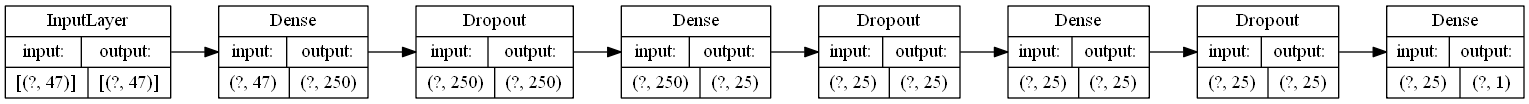

In [46]:

plot_model(model,
           to_file='model_plot Original 06 09.png', 
           show_shapes=True,
           show_layer_names=False,
                         rankdir='LR')

In [ ]:
model.save("my_model_adadelta")

In [47]:
historia=returny[0]

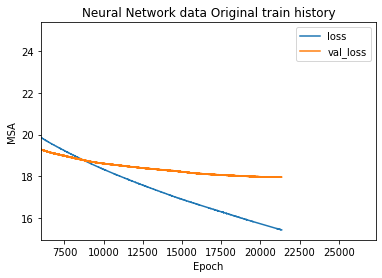

In [59]:
strata_trenowania=historia.history['loss']
strata_walidacji=historia.history['val_loss']
plt.plot(strata_trenowania[6000:],label="loss")
plt.plot(strata_walidacji[6000:],label="val_loss")
plt.xlim(6000,len(strata_trenowania))
plt.title("Neural Network data Original train history")
plt.xlabel("Epoch")
plt.ylabel("MSA")
plt.legend(loc="upper right")
plt.show()


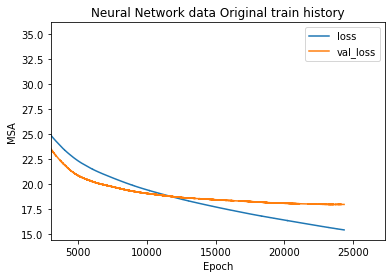

In [60]:
strata_trenowania=historia.history['loss']
strata_walidacji=historia.history['val_loss']
plt.plot(strata_trenowania[3000:],label="loss")
plt.plot(strata_walidacji[3000:],label="val_loss")
plt.xlim(3000,len(strata_trenowania))
plt.title("Neural Network data Original train history")
plt.xlabel("Epoch")
plt.ylabel("MSA")
plt.legend(loc="upper right")
plt.show()



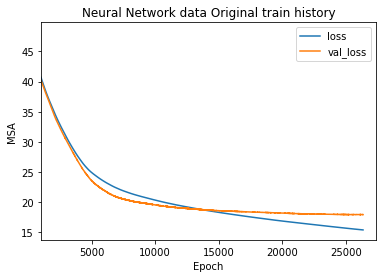

In [61]:
strata_trenowania=historia.history['loss']
strata_walidacji=historia.history['val_loss']
plt.plot(strata_trenowania[1000:],label="loss")
plt.plot(strata_walidacji[1000:],label="val_loss")
plt.xlim(1000,len(strata_trenowania))
plt.title("Neural Network data Original train history")
plt.xlabel("Epoch")
plt.ylabel("MSA")
plt.legend(loc="upper right")
plt.show()




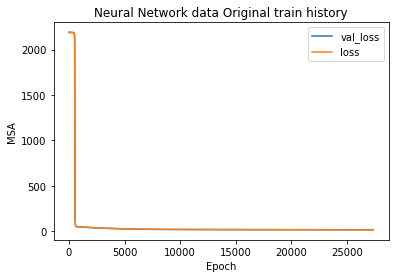

In [62]:
strata_trenowania=historia.history['loss']
strata_walidacji=historia.history['val_loss']
plt.plot(strata_walidacji,label="val_loss")
plt.plot(strata_trenowania,label="loss")
#plt.xlim(10,len(strata_trenowania))
plt.title("Neural Network data Original train history")
plt.xlabel("Epoch")
plt.ylabel("MSA")
plt.legend(loc="upper right")
plt.show()
